In [46]:
# Import Dependencies
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import calendar
import scipy.stats as stats

In [65]:
csv_path1= "clean_crime_data.csv"
crime_df = pd.read_csv(csv_path1)
del crime_df['Unnamed: 0']

crime_df["Weather Type"]=crime_df["Weather Condition"].replace({"Mostly Cloudy":"Cloudy",
                                                                "Overcast":"Cloudy",
                                                                "Partly Cloudy":"Cloudy",
                                                                "Light Rain":"Rainy",
                                                                "Drizzle":"Rainy",
                                                                "Rain":"Rainy",
                                                                "Clear":"Sunny",
                                                                "Light Snow":"Snow",
                                                                "Flurries":"Snow",
                                                                "Humid and Mostly Cloudy":"Humid",
                                                                "Humid and Overcast":"Humid",
                                                                "Humid and Partly Cloudy":"Humid"})

crime_df.head(5)

,Age,Gender,Race,Offenses Severity,Arrest Time of Day,Arrest Hour,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature Range,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone,Weather Type
0,24.0,F,B,Misdemeanor,Evening (9-12am),21,Friday,12,February,2016,20s,20.53,Mostly Cloudy,"1100 Block McKinney LANE Pittsburgh, PA 15205",40.423529,-80.035034,Ridgemont,6,Cloudy
1,31.0,M,W,Misdemeanor,Early Afternoon (1-4pm),15,Wednesday,17,February,2016,30s,32.76,Overcast,"800 Block Concord ST Pittsburgh, PA 15212",40.457564,-79.997924,East Allegheny,1,Cloudy
2,36.0,M,W,Misdemeanor,Early Morning (12-3am),2,Friday,8,April,2016,30s,39.39,Overcast,"Boyd ST & Diamond ST Pittsburgh, PA 15219",40.438656,-79.993293,Bluff,2,Cloudy
3,60.0,M,W,Misdemeanor,Late Morning (9am-12pm),9,Sunday,10,April,2016,30s,32.63,Overcast,"Forbes AV & Armstrong TUN Pittsburgh, PA 15219",40.437971,-79.992052,Bluff,2,Cloudy
4,54.0,M,B,Misdemeanor,Early Morning (12-3am),1,Tuesday,12,April,2016,40s,47.32,Clear,"1600 Block Forbes AV Pittsburgh, PA 15219",40.437377,-79.983870,Bluff,2,Sunny


In [3]:
csv_path2= "all_date_temp_data.csv"
weather_df = pd.read_csv(csv_path2)
del weather_df['Unnamed: 0']

weather_df["Weather Type"]=weather_df["Weather Condition"].replace({"Mostly Cloudy":"Cloudy",
                                                                    "Overcast":"Cloudy",
                                                                    "Partly Cloudy":"Cloudy",
                                                                    "Light Rain":"Rainy",
                                                                    "Drizzle":"Rainy",
                                                                    "Rain":"Rainy",
                                                                    "Clear":"Sunny",
                                                                    "Light Snow":"Snow",
                                                                    "Flurries":"Snow",
                                                                    "Humid and Mostly Cloudy":"Humid",
                                                                    "Humid and Overcast":"Humid",
                                                                    "Humid and Partly Cloudy":"Humid"})

weather_df.head()

,Date,Year,Temperature,Weather Condition,Weather Type
0,2016-02-12,2016,20.53,Mostly Cloudy,Cloudy
1,2016-02-13,2016,12.23,Overcast,Cloudy
2,2016-02-14,2016,17.69,Clear,Sunny
3,2016-02-15,2016,33.15,Overcast,Cloudy
4,2016-02-16,2016,34.92,Light Snow,Snow


<function matplotlib.pyplot.show(*args, **kw)>

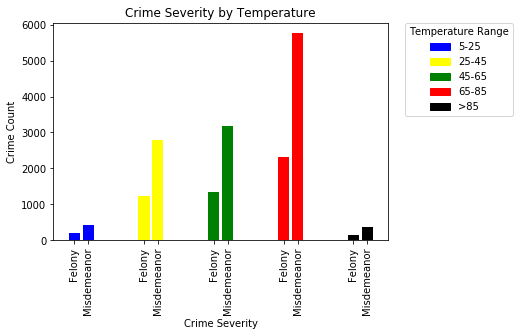

In [48]:
#Temperature group, crime severity bar chart
stevie_plot_df = crime_df[['Offenses Severity', 'Temperature', 'Weather Condition']].copy()


bins = [5,25,45,65,85,1000]
bin_names = ['5-25','25-45','45-65','65-85','>85']

stevie_plot_df['Temperature Group'] = pd.cut(stevie_plot_df["Temperature"],
                                             bins,
                                             labels=bin_names)

stevie_gp1 = stevie_plot_df.groupby(['Temperature Group','Offenses Severity'])
stevie_1_df = stevie_gp1.count()


x_pos = []
for x in range(len(bins) - 1):
    x_pos.append(x*5)
    x_pos.append(x*5+1)
    
    
tick_labels = ['Felony', "Misdemeanor"]
tick_labels = tick_labels *5 
tick_locations = [x for x in x_pos]

color = ['blue', 'yellow', 'green', 'red' , 'black']
colors = []
for x in color:
    colors.append(x)
    colors.append(x)
    

plt.bar(x_pos,
        stevie_1_df['Temperature'],
        color = colors
       )

plt.xticks(tick_locations,
           tick_labels,
           rotation = 'vertical'
          )

plt.title('Crime Severity by Temperature')

plt.ylabel('Crime Count')
plt.xlabel('Crime Severity')

patches = []
for x, y in zip(color, bin_names):
    patches.append(mpatches.Patch(color= x, label= y))
    
plt.legend(title = 'Temperature Range',
           handles=patches,
           bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)
plt.savefig("Plots/crime_severity_temperature.png")

plt.show

In [49]:
stevie_crime_df = crime_df[['Arrest Year',
                           'Arrest Month', 
                           'Offenses Severity', 
                           'Temperature']].copy()

bins = [5,25,45,65,85,1000]
bin_names = ['5-25','25-45','45-65','65-85','>85']

stevie_crime_df['Temperature Group'] = pd.cut(stevie_crime_df["Temperature"],
                                             bins,
                                             labels=bin_names)


stevie_weather_df = weather_df.copy()

stevie_weather_df['Temperature Group'] = pd.cut(stevie_weather_df["Temperature"],
                                             bins,
                                             labels=bin_names)

s_c_gp = stevie_crime_df.groupby(['Temperature Group','Offenses Severity'])
s_ccount_df = s_c_gp.count()

s_w_gp = stevie_weather_df.groupby(['Temperature Group'])
s_wcount_df = s_w_gp.count()
s_wcount_df = s_wcount_df[['Temperature']]


s_ccount_df = s_ccount_df[['Temperature']]
s_wcount_df.head()

s_normcount_df = s_ccount_df.copy()
s_normcount_df['Temperature'] = s_normcount_df['Temperature']/s_wcount_df['Temperature']
#s_normcount_df['Weather Condition'] = s_normcount_df['Weather Condition']/s_wcount_df['Weather Condition']

s_normcount_df = s_normcount_df.reset_index()
stevie_plots = pd.DataFrame({'Temperature Group':list(s_normcount_df['Temperature Group'].unique())})
stevie_plots["M"] = s_normcount_df[s_normcount_df['Offenses Severity'] == 'Misdemeanor']['Temperature'].reset_index(drop = True)
stevie_plots['F'] = s_normcount_df[s_normcount_df['Offenses Severity'] == 'Felony']['Temperature'].reset_index(drop = True)



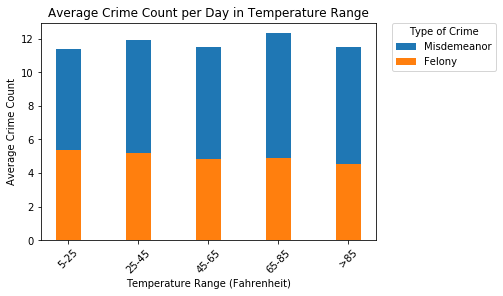

In [63]:
number_of_x = np.arange(5)
p2 = plt.bar(number_of_x, stevie_plots["M"], .35)
p1 = plt.bar(number_of_x, stevie_plots['F'], .35)

plt.xticks(number_of_x, stevie_plots['Temperature Group'], rotation=45)

plt.legend(labels = ['Misdemeanor','Felony'],
           bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.,
           title = "Type of Crime")

plt.title('Average Crime Count per Day in Temperature Range')

plt.ylabel('Average Crime Count')
plt.xlabel('Temperature Range (Fahrenheit)')



plt.savefig("Plots/Average Crime Count per Day in Temperature Range.png")



In [52]:
testdf = stevie_plot_df.groupby('Temperature Group').count().copy()
testdf = testdf[['Temperature']]

temp_df = weather_df.copy()
temp_df['Temperature Group'] = pd.cut(temp_df['Temperature'],
                                           bins,
                                           labels=bin_names)

temp_df = temp_df[['Temperature','Temperature Group']]
temp_df = temp_df.groupby('Temperature Group').count()

tot_days = temp_df['Temperature'].sum()
tot_days

1050

In [54]:
temp_df['Percentage of Days']= temp_df['Temperature']/tot_days
temp_df

,Temperature,Percentage of Days
Temperature Group,,
5-25,38,0.036190
25-45,235,0.223810
45-65,276,0.262857
65-85,468,0.445714
>85,33,0.031429


In [56]:
testdf['Expected Count']=testdf['Temperature'].sum()*temp_df['Percentage of Days']
testdf

,Temperature,Expected Count
Temperature Group,,
5-25,637,642.96
25-45,4023,3976.20
45-65,4504,4669.92
65-85,8072,7918.56
>85,530,558.36


In [57]:
#chi square expected number of crimes per temperature group
stats.chisquare(testdf['Temperature'],testdf['Expected Count'])

Power_divergenceResult(statistic=10.914838596216061, pvalue=0.027537968616950396)

In [61]:
plot2_df = testdf[['Temperature']].copy()
plot2_df['Temperature']
plot2_df['Relative Count'] = plot2_df['Temperature']/s_wcount_df['Temperature']

plot2_df

,Temperature,Relative Count
Temperature Group,,
5-25,637,16.763158
25-45,4023,17.119149
45-65,4504,16.318841
65-85,8072,17.247863
>85,530,16.060606


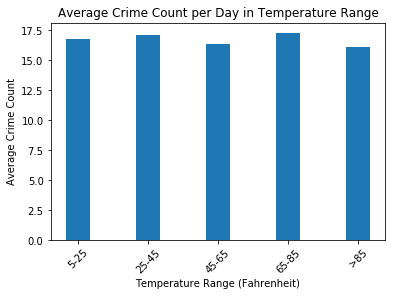

In [62]:
number_of_x = np.arange(5)
p2 = plt.bar(number_of_x, plot2_df['Relative Count'], .35)


plt.xticks(number_of_x, stevie_plots['Temperature Group'], rotation=45)



plt.title('Average Crime Count per Day in Temperature Range')

plt.ylabel('Average Crime Count')
plt.xlabel('Temperature Range (Fahrenheit)')



plt.savefig("Plots/Average Crime Count per Day in Temperature Range.png")

In [ ]:
s_c16_df = stevie_crime_df[stevie_crime_df['Arrest Year'] == 2016]
s_c17_df = stevie_crime_df[stevie_crime_df['Arrest Year'] == 2017]
s_c18_df = stevie_crime_df[stevie_crime_df['Arrest Year'] == 2018]

s_w16_df = stevie_weather_df[stevie_weather_df['Year'] == 2016]
s_w17_df = stevie_weather_df[stevie_weather_df['Year'] == 2017]
s_w18_df = stevie_weather_df[stevie_weather_df['Year'] == 2018]
s_w18_df.head()

### Luiz Peter

In [ ]:
crime_df["Rounded Temp"]=round(crime_df["Temperature"])
temp_group = crime_df.groupby('Rounded Temp').count()["Age"].reset_index().rename(columns={"Age":"Crimes",
                                                                                               "Rounded Temp":"Temperature (F)"})
temp_group.plot(kind="scatter",x= "Temperature (F)" , y= "Crimes", title= "Pittsburgh Temperature VS Crime")
plt.savefig('Plots/temperature_crime.png')

In [ ]:
#Breaking down 15 categories into 6 total for plotting Crime VS 
crime_df["Weather Type"]=crime_df["Weather Condition"].replace({"Mostly Cloudy":"Cloudy","Overcast":"Cloudy","Partly Cloudy":"Cloudy",
                                           "Light Rain":"Rainy","Drizzle":"Rainy","Rain":"Rainy","Clear":"Sunny",
                                           "Light Snow":"Snow","Flurries":"Snow","Humid and Mostly Cloudy":"Humid",
                                            "Humid and Overcast":"Humid","Humid and Partly Cloudy":"Humid"})

temp_type = crime_df.groupby('Weather Type').count()["Age"].reset_index().rename(columns={"Age":"Crimes"})


# Weather Condition VS Percent of Crime: 
 
labels = []
for x in temp_type['Weather Type']:
    labels.append(x)

crimes = []
for x in temp_type['Crimes']:
    crimes.append(x)
    
colors = ["yellow" ,"blue" ,"green", "pink", "purple", "orange"]

explode = [.1,.3,0,0,.3,0]
     
plt.pie(crimes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, 
        pctdistance=.6, labeldistance=1, startangle=150)
plt.title("Crime VS Weather Type")

plt.savefig("Plots/wtype_crime.png")

In [ ]:
#PETER # Crime Frequency vs Time of Year (seasonality)
# Group data by each month
month_group = crime_df.groupby('Arrest Month')
# Find total amount of crime incidents in each month
monthly_crime = month_group['Arrest Date'].count()
# Organize Months to appear in correct yearly order
organized_monthly_crime = monthly_crime.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


# Graph data & edit chart
organized_monthly_crime_chart = organized_monthly_crime.plot(kind="bar", title="Amount of Crime Monthly (2016-2018) ", 
                                        rot='45', color='blue')
organized_monthly_crime_chart.set_xlabel("Month (2016-2018)")
organized_monthly_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")
# Show graph

plt.savefig("Plots/crime_by_month.png")

plt.show()

In [ ]:
# Group data by each month
day_group = crime_df.groupby('Arrest Day of Week')
# Find total amount of crime incidents in each month
daily_crime = day_group['Arrest Date'].count()
# Organize Days of Week to be in correct order
organized_daily_crime = daily_crime.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                                 'Thursday', 'Friday', 'Saturday'])


# Graph data & edit chart
organized_daily_crime_chart = organized_daily_crime.plot(kind="bar", title="Amount of Crime Each Day of the Week (2016-2018) ", 
                                        rot='45', color='blue')
organized_daily_crime_chart.set_xlabel("Day of Week")
organized_daily_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")

plt.savefig("Plots/crime_by_day_of_week.png")

plt.show()

In [ ]:
#PETER # Crime Frequency vs Time of Day 

# Group data by each month
day_time_group = crime_df.groupby('Arrest Time of Day')
# Find total amount of crime incidents in each month
day_time_crime = day_time_group['Arrest Date'].count()

# Graph data & edit chart
day_time_crime_chart = day_time_crime.plot(kind="bar", title="Amount of Crime During Parts of the Day (2016-2018) ", 
                                        rot='45', color='blue')
day_time_crime_chart.set_xlabel("Time of Day")
day_time_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")

plt.savefig("Plots/crime_by_time_of_day.png")

plt.show()



In [ ]:
crime_df.boxplot("Temperature", by="Arrest Month", figsize=(20, 10))
plt.savefig("Plots/Temperature_by_Month_boxplot.png")

In [ ]:
crime_df.boxplot("Age", by="Arrest Month", figsize=(20, 10))
plt.savefig("Plots/Age_by_Month_boxplot.png")

In [ ]:
crime_df.boxplot("Arrest Hour", by="Arrest Month", figsize=(20, 10))
plt.savefig("Plots/Arrest_Hour_by_Month_boxplot.png")

### Ema

In [ ]:
gender_count = crime_df["Gender"].value_counts()
total_gender_count = crime_df["Gender"].count()
gender_percentage = (gender_count/total_gender_count) *100

Gender = ["Male", "Female", "Unknown"]
Percent = [gender_percentage]
colors = ["LightBlue", "Pink", "Black"]
explode = (0.1, 0.1, 0.1)


plt.pie(gender_percentage, explode=explode, labels=Gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime by Gender")

plt.savefig("Plots/crime_by_gender.png")

plt.show()

In [ ]:
race_group = crime_df.groupby("Race")

race_type_crime = race_group["Offenses Severity"].count()

race_plot = race_type_crime.plot(kind="bar",
                                 title="Race vs Crime ",
                                 rot='45', color='orange',
                                 figsize=(10,4),grid=True)


# race_explanation = {'A':'Asian',
#                     'B':'Black',
#                     'H':'Hispanic/Latino',
#                     'I':'American Indian or Alaskan Native',
#                     'O':'Others', 
#                     'U':'Unknown', 
#                     'W':'White'}

# race_explanation = ['A = Asian',
#                     'B = Black',
#                     'H = Hispanic/Latino',
#                     'I = American Indian or Alaskan Native',
#                     'O = Others', 
#                     'U = Unknown', 
#                     'W = White']


race_plot.set_xlabel("Races")

race_plot.set_ylabel("Number of crimes")

# plt.legend(title = 'Race Types'
#            labels = ['A = Asian','B = Black','H = Hispanic/Latino','I = American Indian or Alaskan Native', 'O = Others', 'U = Unknown', 'W = White'],
#            bbox_to_anchor=(1.05, 1),
#            loc=2,
#            borderaxespad=0.)

#plt.text(42,35, s= ['A = Asian \n B = Black \n H = Hispanic/Latino \n I = American Indian or Alaskan Native \n O = Others \n U = Unknown \n W = White'])



plt.savefig("Plots/crime_by_race.png")

plt.show()

In [ ]:
crime_type_count = crime_df["Offenses Severity"].value_counts()
total_crime_count = crime_df["Offenses Severity"].count()
crime_percentage = (crime_type_count/total_crime_count) *100

Offenses = ["Misdemeanor", "Felony"]
Percent = [crime_percentage]
colors = ["Yellow", "Orange"]
explode = (0.1,0)


plt.pie(crime_percentage, explode=explode, labels=Offenses, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime Severitiy")
plt.savefig("Plots/crime_by_severity.png")
plt.show()

In [ ]:
crime_df1 = crime_df.loc[:,["Offenses Severity", "Arrest Year", "Arrest Month"]]

df2=crime_df1.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)

order_list = ["January", "February", "March", "April", 
              "May", "June", "July", "August", "September", 
              "October", "November", "December"] 

df2 = crime_df.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)
df2 = df2[order_list]


df3 = crime_df.groupby(['Offenses Severity', 'Arrest Year'])['Offenses Severity'].count().unstack('Arrest Year').fillna(0)

felonies = df3[:1].values[0]

misdemeanor = df3[1:2].values[0]

number_of_x = np.arange(3)
p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)

year_plot = plt.xticks(number_of_x, df3.columns, rotation=45)
plt.title("Crime Severity by Year")
plt.legend(labels = ['Misdemeanor','Felony'])
plt.savefig("Plots/crime_severity_by_year.png")


In [ ]:
felonies = df2[:1].values[0]

misdemeanor = df2[1:2].values[0]



number_of_x = np.arange(12)
p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)

month_plot = plt.xticks(number_of_x, df2.columns, rotation=45)
plt.legend(labels = ['Misdemeanor','Felony'])
plt.title("Crime Severity by Month")
plt.savefig("Plots/crime_severity_by_month.png")

# Liam

In [ ]:
#Drop irrelevant columns
heatmap_DF = crime_df[['Offenses Severity', 'Arrest Day of Week', 'Arrest Date', 'Arrest Month', 'Arrest Year', 'Temperature', 'Weather Condition', 'Incident Location', 'Incident Latitude', 'Incident Longitude', 'Incident Neighborhood', 'Incident Zone']]
heatmap_DF.head()

In [ ]:
import geopandas as gpd
import folium

#Pull Pittsburgh City Borders
congr_districts = gpd.read_file("API call and cleaning/Resources/cb_2015_us_cd114_20m")
congr_districts.crs = {'datum': 'NAD83', 'ellps': 'GRS80', 'proj':'longlat', 'no_defs':True}

district14 = congr_districts[ congr_districts.GEOID == '4214' ]  # 42 = PA, 14 = District

#Create folium map config
distric_map = folium.Map(location=[40, -80], zoom_start=9, tiles='cartodbpositron' )
print('default map crs: ',distric_map.crs)

In [ ]:
#Create Folium Map
folium.GeoJson(district14).add_to(distric_map)
distric_map

In [ ]:
heatmap_DF["Rounded Lat"] = round(heatmap_DF["Incident Latitude"], 4)
heatmap_DF["Rounded Long"] = round(heatmap_DF["Incident Longitude"], 4)
heatmap_DF2 = heatmap_DF.groupby(["Rounded Lat", "Rounded Long"]).count()
heatmap_DF2 = heatmap_DF2.reset_index()
heatmap_DF2.head()

In [ ]:
import folium
from folium.plugins import HeatMap

#Create heatmap, base column doesnt matter
max_amount = float(heatmap_DF2["Temperature"].max())

hmap = folium.Map(location=[40.45, -80], zoom_start=12, )

hm_wide = HeatMap( list(zip(heatmap_DF2["Rounded Lat"].values, heatmap_DF2["Rounded Long"].values, heatmap_DF2.Temperature.values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(district14).add_to(hmap)
hmap.add_child(hm_wide)

In [ ]:
#Pull Misdemeanors
heatmap_DFM = heatmap_DF.loc[heatmap_DF["Offenses Severity"] == "M"]
heatmap_DFM.head()

In [ ]:
#Group
heatmap_DFM = heatmap_DFM.groupby(["Rounded Lat", "Rounded Long"]).count()
heatmap_DFM = heatmap_DFM.reset_index()
heatmap_DFM.head()

In [ ]:
#For Misdemeanors
max_amount = float(heatmap_DFM["Offenses Severity"].max())

hmap = folium.Map(location=[40.45, -80], zoom_start=12, )

hm_wide = HeatMap( list(zip(heatmap_DFM["Rounded Lat"].values, heatmap_DFM["Rounded Long"].values, heatmap_DFM["Offenses Severity"].values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(district14).add_to(hmap)
hmap.add_child(hm_wide)

In [ ]:
#Pull Felonies
heatmap_DFF = heatmap_DF.loc[heatmap_DF["Offenses Severity"] == "F"]
heatmap_DFF.head()

In [ ]:
#Group
heatmap_DFF = heatmap_DFF.groupby(["Rounded Lat", "Rounded Long"]).count()
heatmap_DFF = heatmap_DFF.reset_index()
heatmap_DFF.head()

In [ ]:
#For Felonies
max_amount = float(heatmap_DFF["Offenses Severity"].max())

hmap = folium.Map(location=[40.45, -80], zoom_start=12, )

hm_wide = HeatMap( list(zip(heatmap_DFF["Rounded Lat"].values, heatmap_DFF["Rounded Long"].values, heatmap_DFF["Offenses Severity"].values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(district14).add_to(hmap)
hmap.add_child(hm_wide)